In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
train = pd.read_csv('P12-Churn-Modelling.csv', sep=",")
test = pd.read_csv('P12-Churn-Modelling-Test-Data.csv', sep=",")

In [65]:
colToDel = ['RowNumber', "CustomerId", "Surname"]
train, test = train.drop(columns = colToDel), test.drop(columns = colToDel)

In [66]:
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
def prep(val):
    if val == 'Female' or val == "France":
        return 0
    elif val == "Male" or val == "Spain":
        return 1
    else:
        return 2
    
train["Gender"] = train["Gender"].apply(prep)
test["Gender"] = test["Gender"].apply(prep)

train["Geography"] = train["Geography"].apply(prep)
test["Geography"] = test["Geography"].apply(prep)

In [68]:
x_col = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance",
         "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]
y_col = ["Exited"]

In [77]:
X_train, X_test, y_train, y_test = train[x_col], test[x_col], train[y_col], test[y_col]

In [70]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,1,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,1,0,43,2,125510.82,1,1,1,79084.10


In [72]:
y_train.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [78]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10000, 10) (10000, 1)
(1000, 10) (1000, 1)


# Stats

In [79]:
X_train.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,0.749500,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,0.830433,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,2.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [80]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


In [81]:
X_train.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [82]:
X_train.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,0.008267,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Geography,0.008267,1.000000,-0.016936,0.048092,0.001418,0.348700,-0.006180,0.004036,-0.012692,0.007382
Gender,-0.002857,-0.016936,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112
Age,-0.003965,0.048092,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.000842,0.001418,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,0.006268,0.348700,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.006180,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,0.004036,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,-0.012692,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,0.007382,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


<AxesSubplot:>

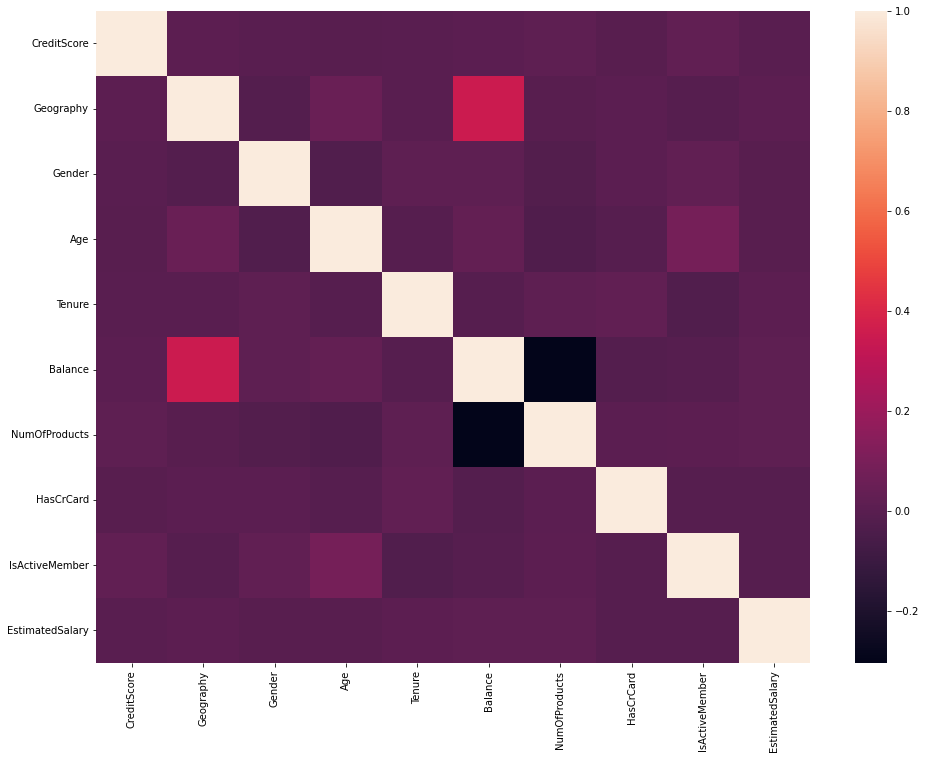

In [83]:
plt.figure(figsize = (16, 12))
sns.heatmap(X_train.corr())

**Balance** et **NumOfProducts** sont les variavles les plus corrélées, mais cette corrélation semble faible. <br> 
*Corrélation* : **0.348700**

# Modelisation

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_roc_curve
import statsmodels.api as sm

In [122]:
logit_model = sm.Logit(y_train, X_train)
lm = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.440284
         Iterations 6


In [125]:
print(lm.summary())

                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Sat, 22 Oct 2022   Pseudo R-squ.:                  0.1290
Time:                        15:29:14   Log-Likelihood:                -4402.8
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                4.032e-275
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
CreditScore        -0.0037      0.000    -19.695      0.000      -0.004      -0.003
Geography           0.3599      0.034     10.708      0.000       0.294       0.426
Gender             -0.6302      

In [124]:
print(lm.summary2())

                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.129      
Dependent Variable: Exited           AIC:              8825.6854  
Date:               2022-10-22 15:29 BIC:              8897.7888  
No. Observations:   10000            Log-Likelihood:   -4402.8    
Df Model:           9                LL-Null:          -5054.9    
Df Residuals:       9990             LLR p-value:      4.0324e-275
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
CreditScore       -0.0037   0.0002 -19.6952 0.0000 -0.0041 -0.0033
Geography          0.3599   0.0336  10.7080 0.0000  0.2940  0.4258
Gender            -0.6302   0.0531 -11.8652 0.0000 -0.7343 -0.5261
Age                0.

In [107]:
model = LogisticRegression()

model.fit(X_train, y_train)
model.coef_, model.intercept_

C:\Users\Papa Ba GAYE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(array([[-5.03585720e-03,  1.56218586e-03, -1.03853584e-03,
          4.37994243e-02, -1.59075948e-03,  3.61853503e-06,
         -4.45887716e-04, -1.86759998e-04, -1.41742761e-03,
         -1.36186225e-06]]),
 array([-0.00019224]))

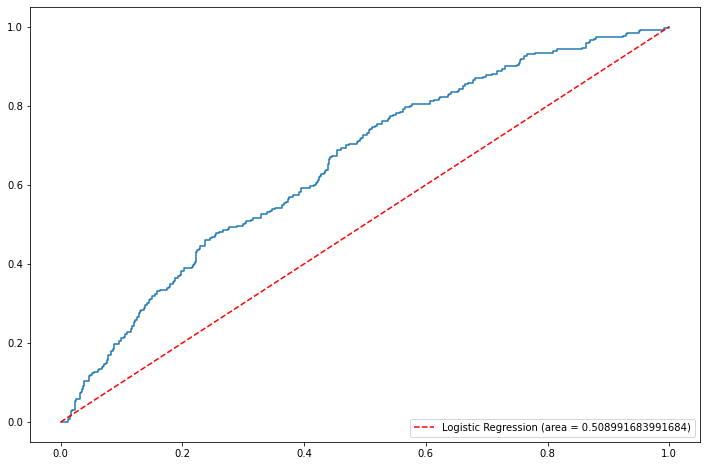

In [120]:
from sklearn.metrics import roc_auc_score, roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'r--', label=f"Logistic Regression (area = {logit_roc_auc})")
# plt.xlim([0, 1.0])
# plt.ylim([0, 1.05])
plt.legend(loc='lower right')
plt.show()

In [135]:
y_pred = model.predict(X_test)

In [136]:
confusion_matrix(y_test, y_pred)

array([[722,  18],
       [249,  11]], dtype=int64)